In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pyuvdata
import os
from datetime import datetime
from astropy.time import Time
import matplotlib.patches as patches

In [12]:
filenames = os.listdir("/lustre/21cmpipe/solar_panel_test/")
filenames = np.sort(np.array([name for name in filenames if name.endswith(".uvfits")]))

In [13]:
antenna_names=[
    "LWA364",
    "LWA362",
    "LWA363",
    "LWA356",
    "LWA355",
    "LWA263",
    "LWA302",
]

In [14]:
power_off_time_intervals = np.array([
    [Time('2025-08-19T04:08:00', format="fits"), Time('2025-08-19T04:11:00', format="fits")],
    [Time('2025-08-19T04:23:00', format="fits"), Time('2025-08-19T04:26:00', format="fits")],
    [Time('2025-08-19T04:39:00', format="fits"), Time('2025-08-19T04:42:00', format="fits")],
    [Time('2025-08-19T04:54:00', format="fits"), Time('2025-08-19T04:57:00', format="fits")],
])

power_on_time_intervals = np.array([
    [Time('2025-08-19T04:13:00', format="fits"), Time('2025-08-19T04:16:00', format="fits")],
    [Time('2025-08-19T04:28:00', format="fits"), Time('2025-08-19T04:31:00', format="fits")],
    [Time('2025-08-19T04:44:00', format="fits"), Time('2025-08-19T04:47:00', format="fits")],
    [Time('2025-08-19T04:59:00', format="fits"), Time('2025-08-19T05:02:00', format="fits")],
])

tracking_time_intervals = np.array([
    [Time('2025-08-19T04:18:00', format="fits"), Time('2025-08-19T04:20:00', format="fits")],
    [Time('2025-08-19T04:34:00', format="fits"), Time('2025-08-19T04:37:00', format="fits")],
    [Time('2025-08-19T04:49:00', format="fits"), Time('2025-08-19T04:52:00', format="fits")],
    [Time('2025-08-19T05:04:00', format="fits"), Time('2025-08-19T05:07:00', format="fits")],
])

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

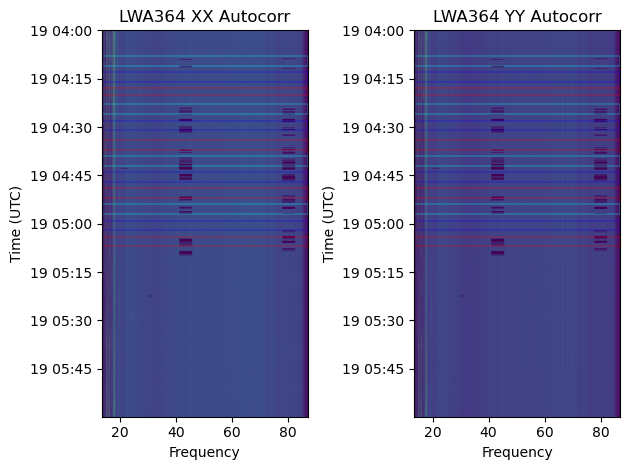

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

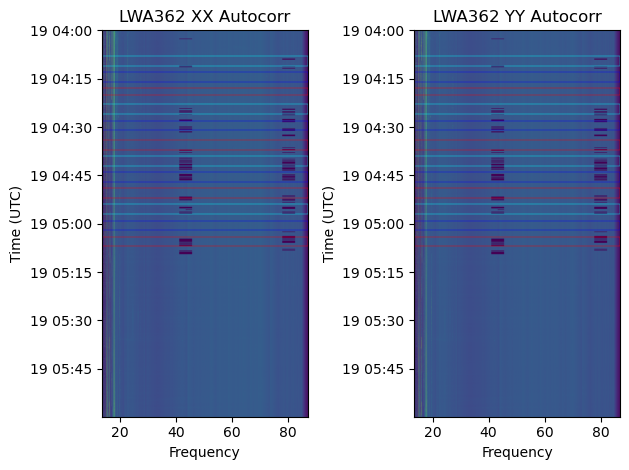

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

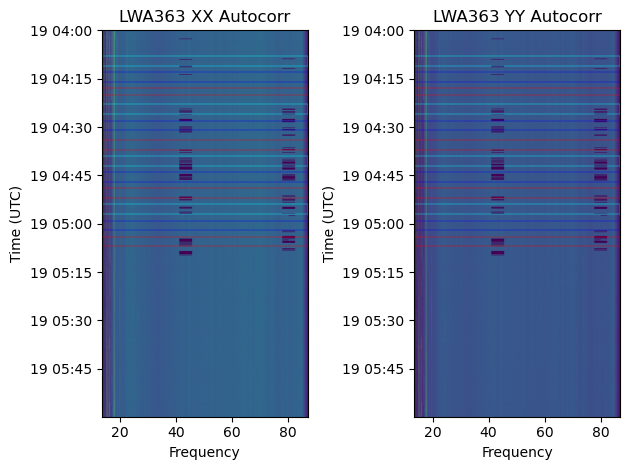

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

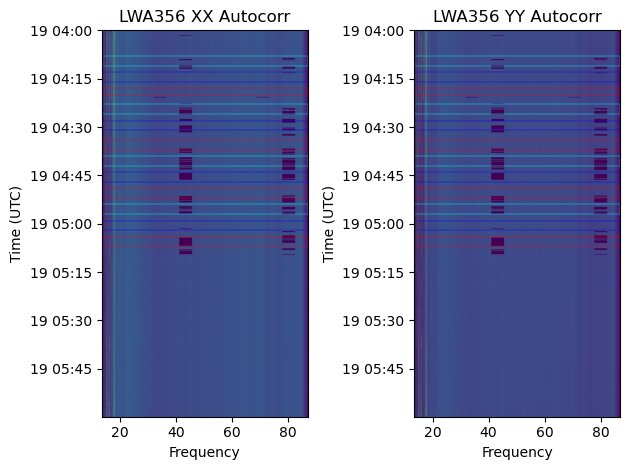

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

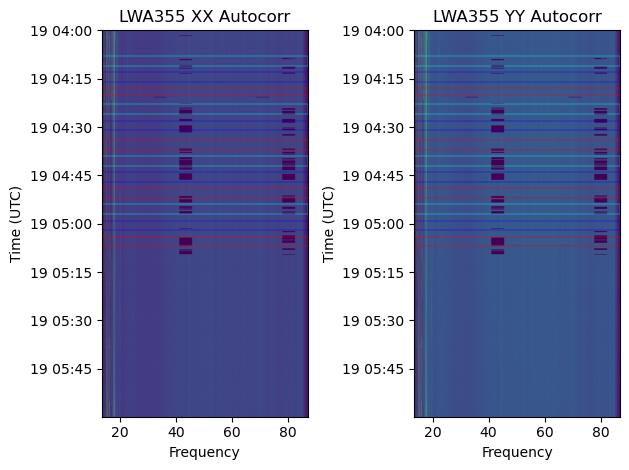

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

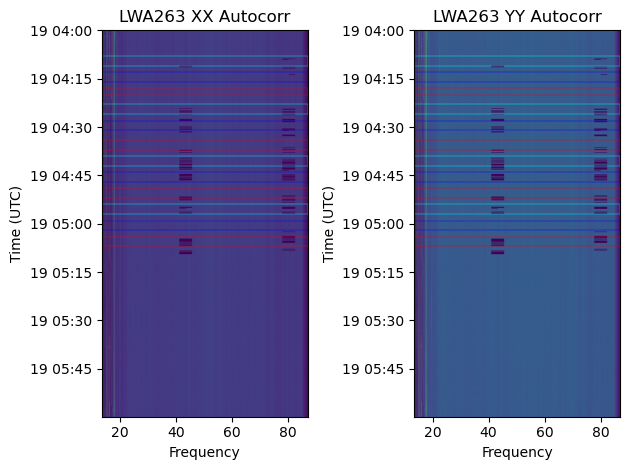

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

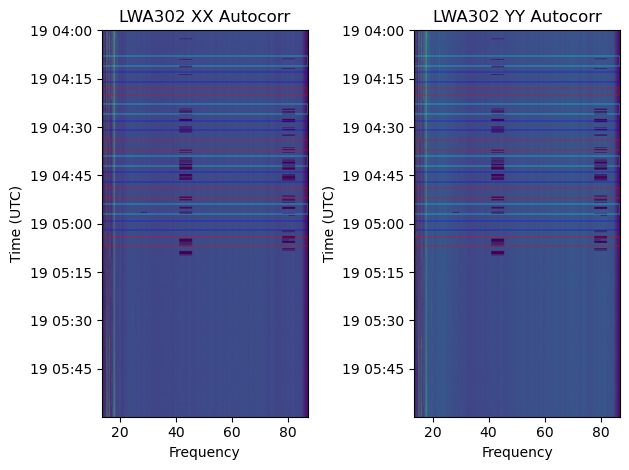

In [15]:
for antname in antenna_names:
    first_file = True
    times = []
    for use_filename in filenames:
        new_uv = pyuvdata.UVData()
        new_uv.read(
            f"/lustre/21cmpipe/solar_panel_test/{use_filename}"
        )
        new_uv.select(antenna_names=antname, polarizations=[-5, -6])
        times.append(
            datetime(int(use_filename[:4]), int(use_filename[4:6]), int(use_filename[6:8]), int(use_filename[9:11]), int(use_filename[11:13]), int(use_filename[13:15]))
        )
        if first_file:
            uv = new_uv
            first_file = False
        else:
            uv += new_uv

    fig, ax = plt.subplots(ncols=2, nrows=1)
    x_start = np.min(uv.freq_array)/1e6
    x_end = np.max(uv.freq_array)/1e6
    for pol in [0, 1]:
        im = ax[pol].imshow(
            np.abs(uv.data_array[:,:,pol]),
            extent=[x_start, x_end, np.max(times), np.min(times)],
            aspect="auto",
            vmin=0,
            vmax=100,
            origin="upper",
            interpolation=None,
        )
        ax[pol].set_xlabel("Frequency")
        ax[pol].set_ylabel("Time (UTC)")

    # Add rectangles
    for time_interval_ind in range(4):
        power_off_start_time = power_off_time_intervals[time_interval_ind, 0].to_datetime()
        power_off_end_time = power_off_time_intervals[time_interval_ind, 1].to_datetime()
        power_off_rect0 = patches.Rectangle((x_start, power_off_start_time), x_end-x_start, power_off_end_time-power_off_start_time, linewidth=0.3, edgecolor="cyan", facecolor="none")
        power_off_rect1 = patches.Rectangle((x_start, power_off_start_time), x_end-x_start, power_off_end_time-power_off_start_time, linewidth=0.3, edgecolor="cyan", facecolor="none")
        ax[0].add_patch(power_off_rect0)
        ax[1].add_patch(power_off_rect1)

        power_on_start_time = power_on_time_intervals[time_interval_ind, 0].to_datetime()
        power_on_end_time = power_on_time_intervals[time_interval_ind, 1].to_datetime()
        power_on_rect0 = patches.Rectangle((x_start, power_on_start_time), x_end-x_start, power_on_end_time-power_on_start_time, linewidth=0.3, edgecolor="blue", facecolor="none")
        power_on_rect1 = patches.Rectangle((x_start, power_on_start_time), x_end-x_start, power_on_end_time-power_on_start_time, linewidth=0.3, edgecolor="blue", facecolor="none")
        ax[0].add_patch(power_on_rect0)
        ax[1].add_patch(power_on_rect1)

        tracking_start_time = tracking_time_intervals[time_interval_ind, 0].to_datetime()
        tracking_end_time = tracking_time_intervals[time_interval_ind, 1].to_datetime()
        tracking_rect0 = patches.Rectangle((x_start, tracking_start_time), x_end-x_start, tracking_end_time-tracking_start_time, linewidth=0.3, edgecolor="red", facecolor="none")
        tracking_rect1 = patches.Rectangle((x_start, tracking_start_time), x_end-x_start, tracking_end_time-tracking_start_time, linewidth=0.3, edgecolor="red", facecolor="none")
        ax[0].add_patch(tracking_rect0)
        ax[1].add_patch(tracking_rect1)
        
    ax[0].set_title(f"{antname} XX Autocorr")
    ax[1].set_title(f"{antname} YY Autocorr")
    #fig.colorbar(im)
    plt.tight_layout()
    plt.savefig(f"/lustre/rbyrne/autocorr_plot_{antname}.png", dpi=600)
    plt.show()

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

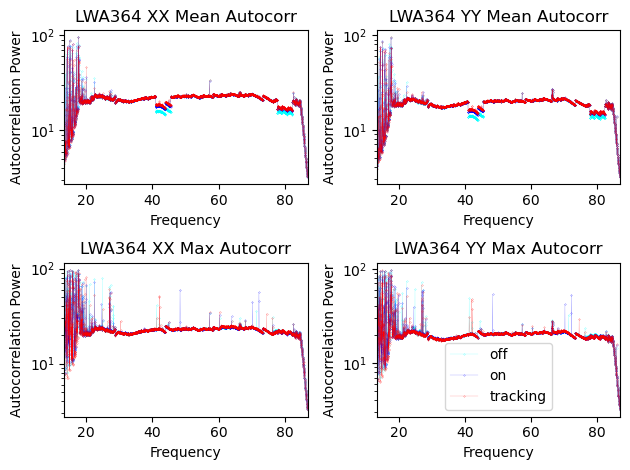

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

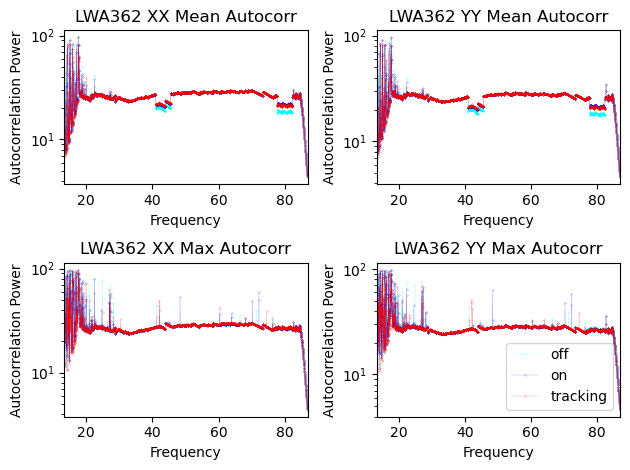

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

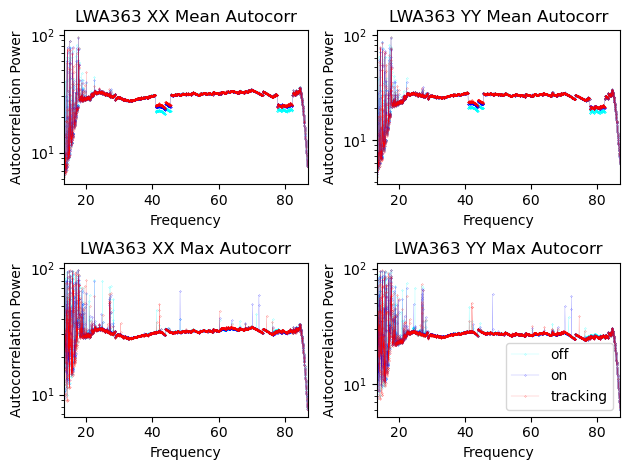

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

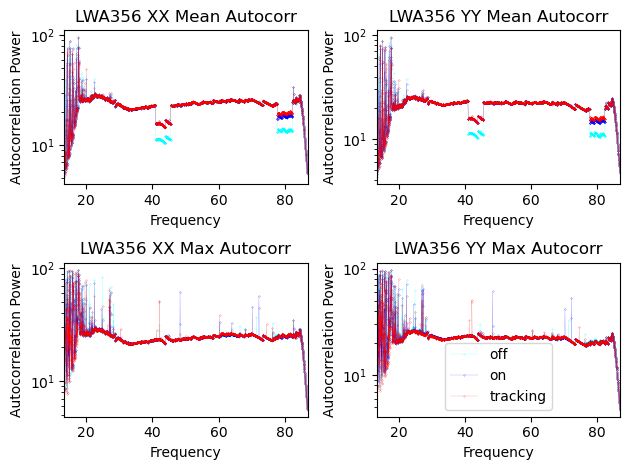

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

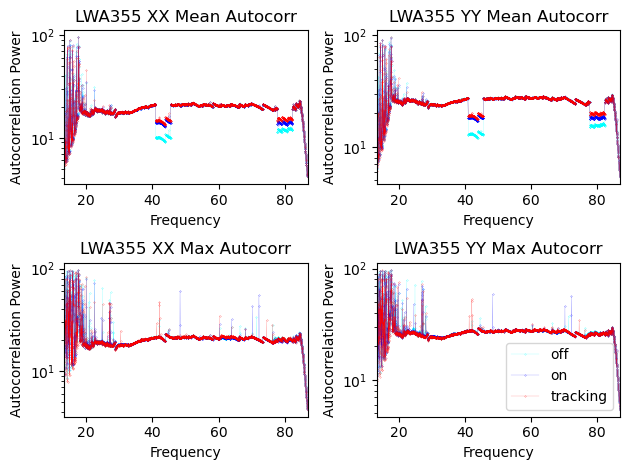

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

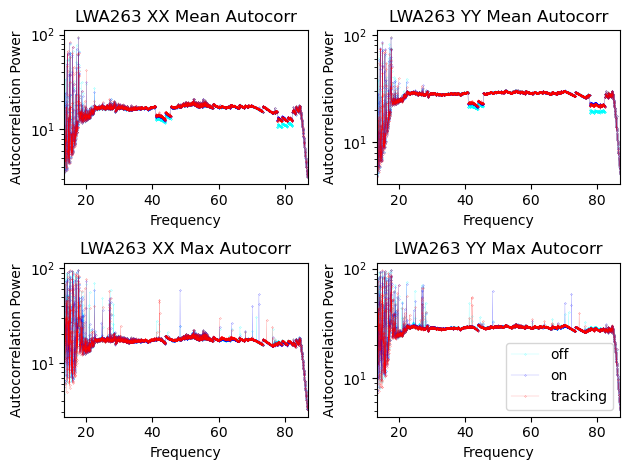

The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a different ID and parameters.
The provided name zenith is already used but has different parameters. Adding another entry with the same name but a differe

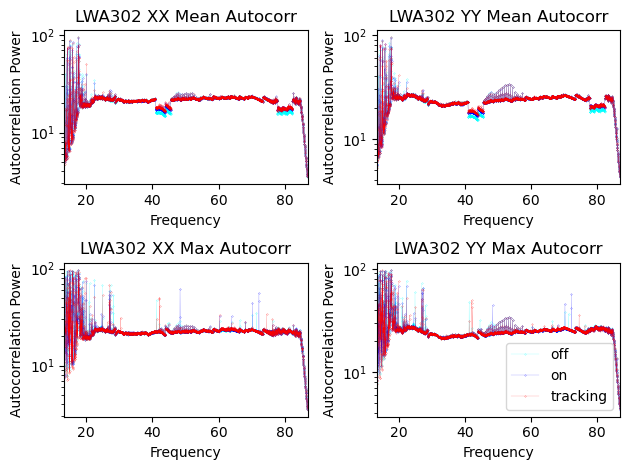

In [53]:
for antname in antenna_names:
    first_file = True
    times = []
    for use_filename in filenames:
        new_uv = pyuvdata.UVData()
        new_uv.read(
            f"/lustre/21cmpipe/solar_panel_test/{use_filename}"
        )
        new_uv.select(antenna_names=antname, polarizations=[-5, -6])
        times.append(
            datetime(int(use_filename[:4]), int(use_filename[4:6]), int(use_filename[6:8]), int(use_filename[9:11]), int(use_filename[11:13]), int(use_filename[13:15]))
        )
        if first_file:
            uv = new_uv
            first_file = False
        else:
            uv += new_uv

    times = np.unique(uv.time_array)
    power_off_times = []
    power_on_times = []
    tracking_times = []
    for time_interval_ind in range(4):
        power_off_start_time = power_off_time_intervals[time_interval_ind, 0].jd
        power_off_end_time = power_off_time_intervals[time_interval_ind, 1].jd
        power_on_start_time = power_on_time_intervals[time_interval_ind, 0].jd
        power_on_end_time = power_on_time_intervals[time_interval_ind, 1].jd
        tracking_start_time = tracking_time_intervals[time_interval_ind, 0].jd
        tracking_end_time = tracking_time_intervals[time_interval_ind, 1].jd
    
        power_off_times.extend(times[np.where((times > power_off_start_time) & (times < power_off_end_time))])
        power_on_times.extend(times[np.where((times > power_on_start_time) & (times < power_on_end_time))])
        tracking_times.extend(times[np.where((times > tracking_start_time) & (times < tracking_end_time))])

    power_off_uv = uv.select(times=power_off_times, inplace=False)
    power_on_uv = uv.select(times=power_on_times, inplace=False)
    tracking_uv = uv.select(times=tracking_times, inplace=False)

    fig, ax = plt.subplots(ncols=2, nrows=2)
    for pol in [0, 1]:
        ax[0, pol].plot(power_off_uv.freq_array/1e6, np.mean(power_off_uv.data_array[:,:,pol], axis=0), ".-", linewidth=0.1, markersize=0.3, color="cyan", label="off")
        ax[0, pol].plot(power_on_uv.freq_array/1e6, np.mean(power_on_uv.data_array[:,:,pol], axis=0), ".-", linewidth=0.1, markersize=0.3, color="blue", label="on")
        ax[0, pol].plot(tracking_uv.freq_array/1e6, np.mean(tracking_uv.data_array[:,:,pol], axis=0), ".-", linewidth=0.1, markersize=0.3, color="red", label="tracking")
        ax[0, pol].set_xlabel("Frequency")
        ax[0, pol].set_ylabel("Autocorrelation Power")
        ax[0, pol].set_xlim((np.min(power_off_uv.freq_array/1e6), np.max(power_off_uv.freq_array/1e6)))
        ax[0, pol].set_yscale("log")

        ax[1, pol].plot(power_off_uv.freq_array/1e6, np.max(power_off_uv.data_array[:,:,pol], axis=0), ".-", linewidth=0.1, markersize=0.3, color="cyan", label="off")
        ax[1, pol].plot(power_on_uv.freq_array/1e6, np.max(power_on_uv.data_array[:,:,pol], axis=0), ".-", linewidth=0.1, markersize=0.3, color="blue", label="on")
        ax[1, pol].plot(tracking_uv.freq_array/1e6, np.max(tracking_uv.data_array[:,:,pol], axis=0), ".-", linewidth=0.1, markersize=0.3, color="red", label="tracking")
        ax[1, pol].set_xlabel("Frequency")
        ax[1, pol].set_ylabel("Autocorrelation Power")
        ax[1, pol].set_xlim((np.min(power_off_uv.freq_array/1e6), np.max(power_off_uv.freq_array/1e6)))
        ax[1, pol].set_yscale("log")

    ax[0, 0].set_title(f"{antname} XX Mean Autocorr")
    ax[0, 1].set_title(f"{antname} YY Mean Autocorr")
    ax[1, 0].set_title(f"{antname} XX Max Autocorr")
    ax[1, 1].set_title(f"{antname} YY Max Autocorr")

    plt.legend()
    plt.tight_layout()
    plt.savefig(f"/lustre/rbyrne/time_avg_autocorr_plot_{antname}.png", dpi=600)
    plt.show()